In [81]:
from fastbook import *


In [82]:
from fastai.vision.all import *

In [105]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [106]:
ims = search_images_ddg( 'animal')
len(ims)

200

In [142]:
dest = 'images/animal.jpg'
download_url(ims[0], dest)

Path('images/animal.jpg')

In [143]:
animal_types = 'dolphin','shark'
path = Path('animal')

In [144]:
if not path.exists():
    path.mkdir()
    for o in animal_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg( f'{o} animal')
        download_images(dest, urls=results)

In [145]:
fns = get_image_files(path)
fns

(#393) [Path('animal/dolphin/0039a060-8de0-42d2-bf6e-e9879230a7ff.jpg'),Path('animal/dolphin/005ad608-6ecc-4b0f-8400-b7d508d7070f.jpg'),Path('animal/dolphin/008bedbd-fcc5-49e2-889a-8b38ddd24ed7.jpg'),Path('animal/dolphin/027d4967-4613-432c-98b8-19566fdebdb1.jpg'),Path('animal/dolphin/027f9bdd-a1cc-4f2f-af3e-69b74df33dae.jpg'),Path('animal/dolphin/05eaebd1-62a7-40bc-a08b-aee35073ea84.jpg'),Path('animal/dolphin/06cdb5b4-3058-4ac8-8332-8d26bc4905c3.jpeg'),Path('animal/dolphin/075c1609-5b0f-4520-bab4-8c208e62be71.jpg'),Path('animal/dolphin/090f8850-8cb6-4ca2-a800-77a2a3ef9c12.jpg'),Path('animal/dolphin/0943fe6f-e9b1-4d76-acb2-1b8308b4ecf8.jpeg')...]

In [146]:
failed = verify_images(fns)
failed

(#2) [Path('animal/shark/1ccd6bd1-ad70-4c49-8663-08c266a75a42.jpg'),Path('animal/shark/2ba9328c-4b3e-4126-a3bd-ae186516604b.jpg')]

In [147]:
failed.map(Path.unlink);

In [148]:
animal = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [149]:
dls = animal.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


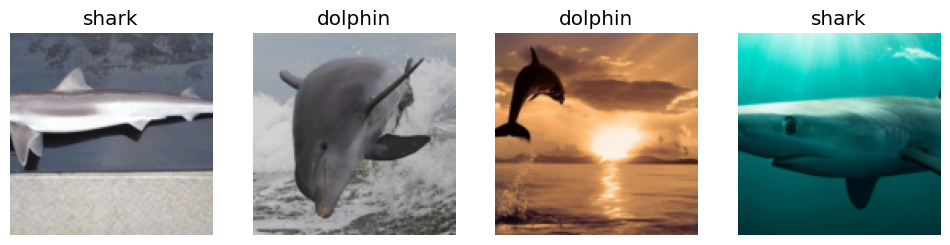

In [150]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


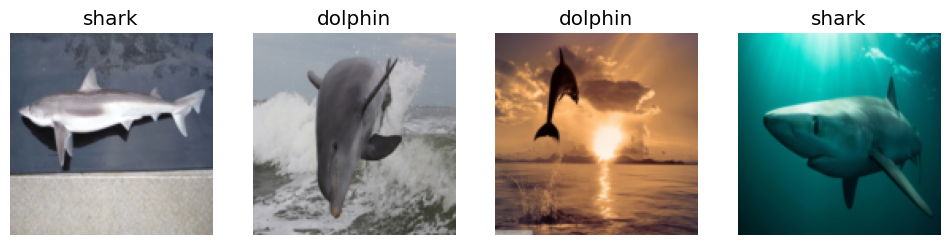

In [156]:
animal = animal.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = animal.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


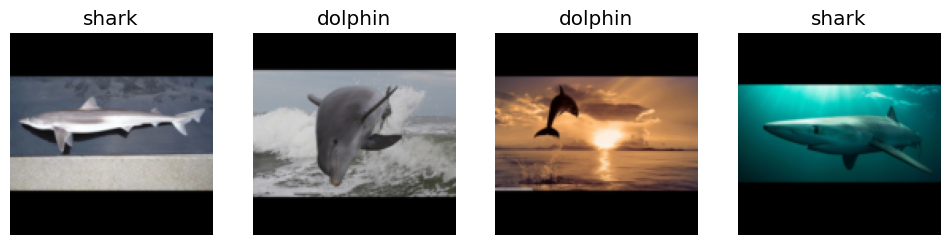

In [157]:
animal=animal.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = animal.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [166]:
animal=animal.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = animal.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [167]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.remove_cb(ProgressCallback)
learn.fine_tune(4)

[0, 0.8013343811035156, 0.369200199842453, 0.11999999731779099, '00:23']
[0, 0.39960145950317383, 0.2873459756374359, 0.07999999076128006, '00:31']
[1, 0.3668813705444336, 0.2414751946926117, 0.07999999821186066, '00:30']
[2, 0.3022560179233551, 0.26841500401496887, 0.13333334028720856, '00:30']
[3, 0.2631451487541199, 0.2818073034286499, 0.1066666692495346, '00:30']


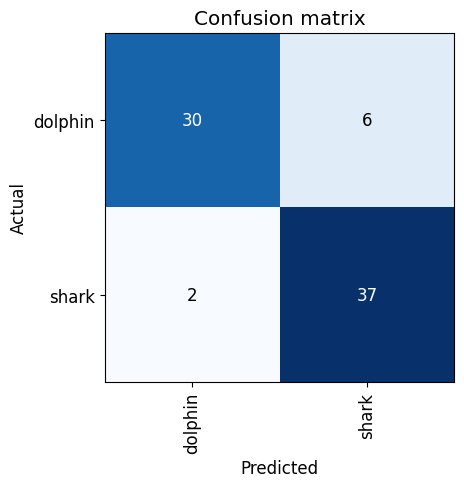

In [168]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

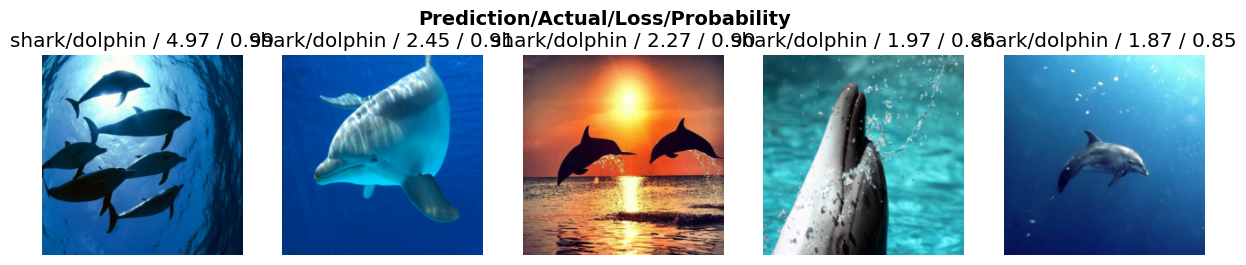

In [169]:
interp.plot_top_losses(5, nrows=1)

In [134]:
from fastai.vision.widgets import *


In [170]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [171]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
    

In [172]:
print('')